<a href="https://colab.research.google.com/github/Wojtek130/Machine-Learning/blob/main/ml_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 7

**Submission deadline:**
* **lab session in the week 22-26.1.24**

**Points: 5 points**


Have a look at the following implementation of Decision Tree Classifier. Be aware that for the sake of further simplicity it does not allow for categorical variables as typical Decision Trees do.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class DecisionTreeClassifierScratch:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        if depth == self.max_depth or len(set(y)) == 1:
            return {'class': max(set(y), key=list(y).count)}

        # Find the best split
        best_feature, best_threshold = self.find_best_split(X, y)

        if best_feature is None:
            return {'class': max(set(y), key=list(y).count)}

        # Split the dataset
        left_indices = X[best_feature] <= best_threshold
        right_indices = ~left_indices

        # Recursively build the tree
        left_subtree = self.fit(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.fit(X[right_indices], y[right_indices], depth + 1)

        return {'feature': best_feature, 'threshold': best_threshold,
                'left': left_subtree, 'right': right_subtree}

    def find_best_split(self, X, y):
        best_gini = 1.0
        best_feature = None
        best_threshold = None

        for feature in X.columns:
            thresholds = X[feature].unique()
            for threshold in thresholds:
                left_indices = X[feature] <= threshold
                right_indices = ~left_indices

                gini = self.calculate_gini_impurity(y[left_indices], y[right_indices])

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def calculate_gini_impurity(self, left_labels, right_labels):
        left_size = len(left_labels)
        right_size = len(right_labels)
        total_size = left_size + right_size

        if total_size == 0:
            return 0

        p_left = left_size / total_size
        p_right = right_size / total_size

        gini_left = 1.0 - sum((np.sum(left_labels == c) / left_size) ** 2 for c in set(left_labels))
        gini_right = 1.0 - sum((np.sum(right_labels == c) / right_size) ** 2 for c in set(right_labels))

        gini_impurity = p_left * gini_left + p_right * gini_right

        return gini_impurity

    def predict_single(self, tree, sample):
        if 'class' in tree:
            return tree['class']

        if sample[tree['feature']] <= tree['threshold']:
            return self.predict_single(tree['left'], sample)
        else:
            return self.predict_single(tree['right'], sample)

    def predict(self, X):
        return [self.predict_single(self.tree, sample) for _, sample in X.iterrows()]


# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Use only two features for visualization purposes
X_iris = iris_df[['petal length (cm)', 'petal width (cm)']]
y_iris = iris_df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Create and train the decision tree classifier from scratch
clf = DecisionTreeClassifierScratch(max_depth=4)
clf.tree = clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)
# print()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 1.00


In [ ]:
def plot_decision_boundary(X, y, tree, feature_names, title="Decision Boundary"):
    # Plot the decision boundary
    plt.figure(figsize=(8, 6))

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = np.array(tree.predict(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=feature_names))).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.show()

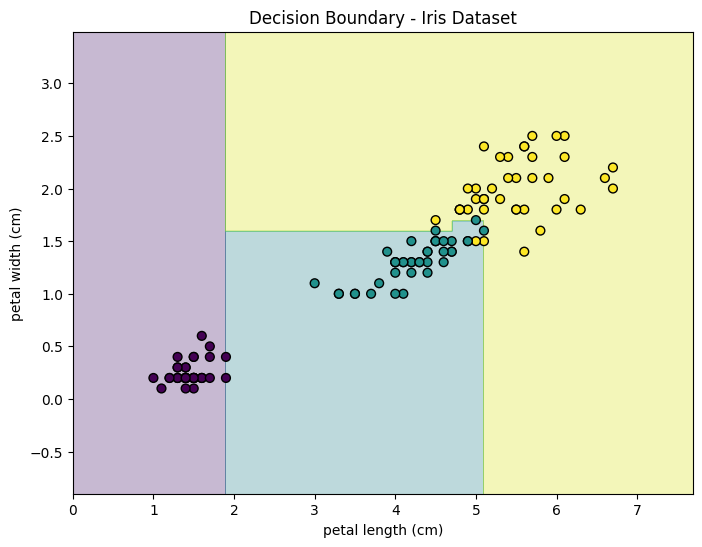

In [ ]:
feature_names = X_iris.columns
plot_decision_boundary(X_train, y_train, clf, feature_names, title="Decision Boundary - Iris Dataset")


# Problem 1 [1p]

Based on above implementation, create a Decision Tree model which uses entropy and not Gini. Verify its accuracy on Iris (as above) and plot decision boundaries.

In [ ]:
def entropy(y):
    total_sum = 0
    total_occ = y.count()
    for _, occ in y.value_counts().items():
        p = occ/total_occ
        total_sum += p * np.log2(p)
    #y is pandas.Series
        #TODO put your code here
    entropy = (-1) * total_sum
    return entropy

Accuracy: 1.00


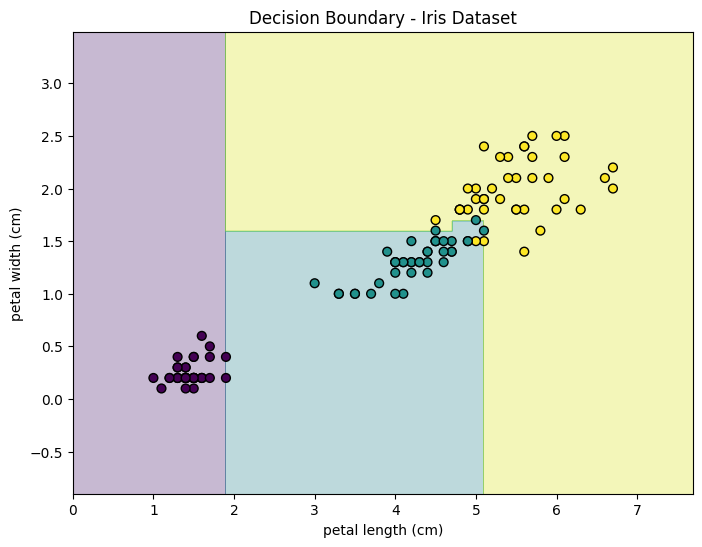

In [ ]:
class DecisionTreeClassifierScratchEntropy:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        # print(y)
        if depth == self.max_depth or len(set(y)) == 1:
            return {'class': max(set(y), key=list(y).count)}

        # Find the best split
        best_feature, best_threshold = self.find_best_split(X, y)

        if best_feature is None:
            return {'class': max(set(y), key=list(y).count)}

        # Split the dataset
        left_indices = X[best_feature] <= best_threshold
        right_indices = ~left_indices

        # Recursively build the tree
        left_subtree = self.fit(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.fit(X[right_indices], y[right_indices], depth + 1)

        return {'feature': best_feature, 'threshold': best_threshold,
                'left': left_subtree, 'right': right_subtree}

    def find_best_split(self, X, y):
        # best_gini = 1.0
        best_entropy = 100000.0
        best_feature = None
        best_threshold = None

        for feature in X.columns:
            thresholds = X[feature].unique()
            for threshold in thresholds:
                left_indices = X[feature] <= threshold
                right_indices = ~left_indices


                entropy = self.calculate_entropy(y[left_indices], y[right_indices])

                if entropy < best_entropy:
                    best_entropy = entropy
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def calculate_entropy(self, left_labels, right_labels):
        left_size = len(left_labels)
        right_size = len(right_labels)
        total_size = left_size + right_size

        if total_size == 0:
            return 0

        p_left = left_size / total_size
        p_right = right_size / total_size

        entropy_left = entropy(left_labels)
        entropy_right = entropy(right_labels)
        # print("->", entropy_left, entropy_right, "entropy")
        total_entropy = p_left * entropy_left + p_right * entropy_right

        return total_entropy

    def predict_single(self, tree, sample):
        if 'class' in tree:
            return tree['class']

        if sample[tree['feature']] <= tree['threshold']:
            return self.predict_single(tree['left'], sample)
        else:
            return self.predict_single(tree['right'], sample)

    def predict(self, X):
        return [self.predict_single(self.tree, sample) for _, sample in X.iterrows()]


# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Use only two features for visualization purposes
X_iris = iris_df[['petal length (cm)', 'petal width (cm)']]
y_iris = iris_df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Create and train the decision tree classifier from scratch
clf = DecisionTreeClassifierScratchEntropy(max_depth=4)
clf.tree = clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)
# print(clf.tree)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
feature_names = X_iris.columns
plot_decision_boundary(X_train, y_train, clf, feature_names, title="Decision Boundary - Iris Dataset")
# print(list(X_test.iterrows())[0])


# Problem 2 [2p]

Default versions of Decision Trees use entropy or Gini to find best features. However, there are is no global objective function that they optimize while training.

Based on the above implementation, please write Decision Tree Classifier that explicitely minimizes the crossentropy function, and makes splits in a greedy way that creates the biggest drop in the Negative Log Likelihood. Verify its accuracy on Iris (as above) and plot decision boundaries.

In [ ]:
def negative_log_likelihood(y):
    y_len = y.count()
    if y_len == 0:
        return 0
    total_sum = 0
    e = 1e-7
    for a in y:
        p = np.sum(y == a) / y_len
        if a == 1:
            total_sum -= np.log2(p + e)
        else:
            total_sum -= np.log2(1 - p + e)
    return total_sum

Accuracy: 1.00


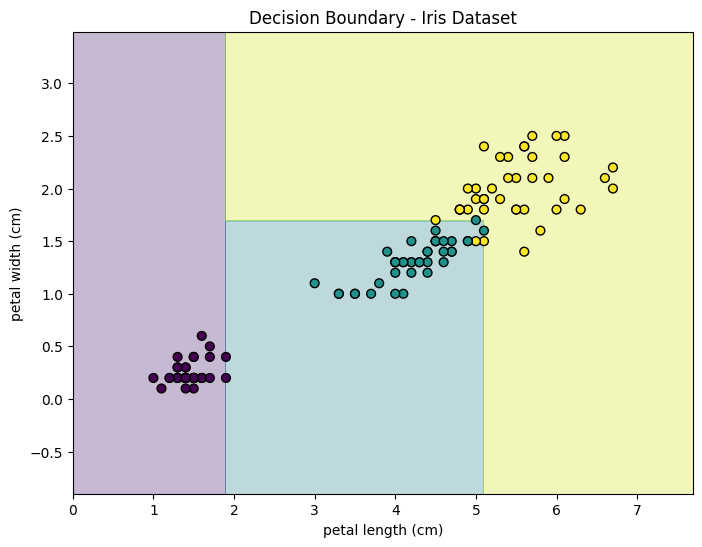

In [ ]:
class DecisionTreeClassifierScratchCrossEntropy:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        # print(y)
        if depth == self.max_depth or len(set(y)) == 1:
            return {'class': max(set(y), key=list(y).count)}

        # Find the best split
        best_feature, best_threshold = self.find_best_split(X, y)

        if best_feature is None:
            return {'class': max(set(y), key=list(y).count)}

        # Split the dataset
        left_indices = X[best_feature] <= best_threshold
        right_indices = ~left_indices

        # Recursively build the tree
        left_subtree = self.fit(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.fit(X[right_indices], y[right_indices], depth + 1)

        return {'feature': best_feature, 'threshold': best_threshold,
                'left': left_subtree, 'right': right_subtree}

    def find_best_split(self, X, y):
        # best_gini = 1.0
        best_negative_log_likelihood = -100000.0
        best_feature = None
        best_threshold = None

        for feature in X.columns:
            thresholds = X[feature].unique()
            for threshold in thresholds:
                left_indices = X[feature] <= threshold
                right_indices = ~left_indices
                # print(threshold)

                negative_log_likelihood_curr = self.calculate_negative_log_likelihood(y[left_indices], y[right_indices])

                if negative_log_likelihood_curr > best_negative_log_likelihood:
                    best_negative_log_likelihood = negative_log_likelihood_curr
                    best_feature = feature
                    best_threshold = threshold
        # print(negative_log_likelihood_curr)
        return best_feature, best_threshold

    def calculate_negative_log_likelihood(self, left_labels, right_labels):
        left_size = len(left_labels)
        right_size = len(right_labels)
        total_size = left_size + right_size

        if total_size == 0:
            return 0

        p_left = left_size / total_size
        p_right = right_size / total_size

        negative_log_likelihood_left = negative_log_likelihood(left_labels)

        negative_log_likelihood_right = negative_log_likelihood(right_labels)
        # print("->", entropy_left, entropy_right, "entropy")
        total_negative_log_likelihood = negative_log_likelihood_left + negative_log_likelihood_right

        return total_negative_log_likelihood

    def predict_single(self, tree, sample):
        if 'class' in tree:
            return tree['class']

        if sample[tree['feature']] <= tree['threshold']:
            return self.predict_single(tree['left'], sample)
        else:
            return self.predict_single(tree['right'], sample)

    def predict(self, X):
        return [self.predict_single(self.tree, sample) for _, sample in X.iterrows()]


# Load Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Use only two features for visualization purposes
X_iris = iris_df[['petal length (cm)', 'petal width (cm)']]
y_iris = iris_df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Create and train the decision tree classifier from scratch
clf = DecisionTreeClassifierScratchCrossEntropy(max_depth=4)
clf.tree = clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)
# print(clf.tree)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
feature_names = X_iris.columns
plot_decision_boundary(X_train, y_train, clf, feature_names, title="Decision Boundary - Iris Dataset")
# print(list(X_test.iterrows())[0])

# Problem 3 [2p]

Based on the above implementation, create a Decision Tree Regressor which greedily chooses a split which locally minimizes MSE the most. Verify its correctness as shown below.

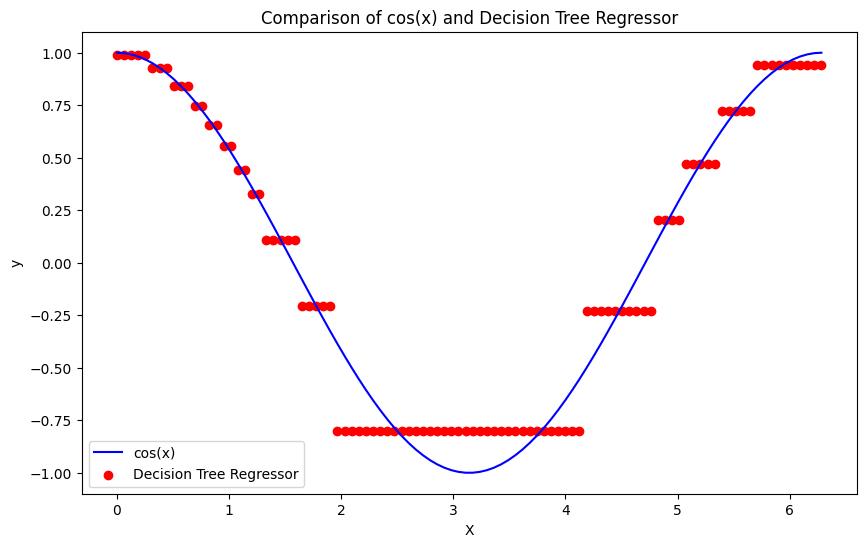

<class 'numpy.ndarray'>


In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Generate dataset
X = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)  # X values
y = np.cos(X).ravel()  # y values (cos(x))


# Create and train the decision tree regressor from scratch
regressor = DecisionTreeRegressor(max_depth=4)
regressor.fit(X, y)

# Predict on the generated dataset
y_pred = regressor.predict(X)

# Plotting both the cos(x) and the decision tree regressor predictions
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='cos(x)', color='blue')
plt.scatter(X, y_pred, label='Decision Tree Regressor', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of cos(x) and Decision Tree Regressor')
plt.legend()
plt.show()

print(type(y))

In [ ]:
class DecisionTreeRegressorScratch:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y, depth=0):
        if depth == self.max_depth or len(set(y)) == 1:
            # return {'class': max(set(y), key=list(y).count)}
            return {'value': np.mean(y)}

        # Find the best split
        best_threshold = self.find_best_split(X, y)

        if best_threshold is None:
            # return {'class': max(set(y), key=list(y).count)}
            return {'value': np.mean(y)}

        # Split the dataset
        left_indices = X <= best_threshold
        right_indices = ~left_indices

        # Recursively build the tree
        left_subtree = self.fit(X[left_indices.flatten()], y[left_indices.flatten()], depth + 1)
        right_subtree = self.fit(X[right_indices.flatten()], y[right_indices.flatten()], depth + 1)

        return {'threshold': best_threshold, 'left': left_subtree, 'right': right_subtree}

    def find_best_split(self, X, y):
        minimal_error = 100000.0
        best_threshold = None

        thresholds = np.unique(X)
        for threshold in thresholds:
            left_indices = X <= threshold
            right_indices = ~left_indices
            error = self.calculate_error(y[left_indices.flatten()], y[right_indices.flatten()])

            # print(gini, "gini")
            if error < minimal_error:
                minimal_error = error
                # best_feature = feature
                best_threshold = threshold

        return best_threshold

    def calculate_error(self, left_labels, right_labels):
        left_size = len(left_labels)
        right_size = len(right_labels)
        total_size = left_size + right_size

        if total_size == 0:
            return 0


        error_left = np.sum((left_labels - np.mean(left_labels))**2)
        error_right = np.sum((right_labels - np.mean(right_labels))**2)

        total_error = error_left + error_right


        return total_error

    def predict_single(self, tree, sample):
        if 'value' in tree:
            return tree['value']

        if sample<= tree['threshold']:
            return self.predict_single(tree['left'], sample)
        else:
            return self.predict_single(tree['right'], sample)

    def predict(self, X):
        return [self.predict_single(self.tree, sample) for sample in X]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


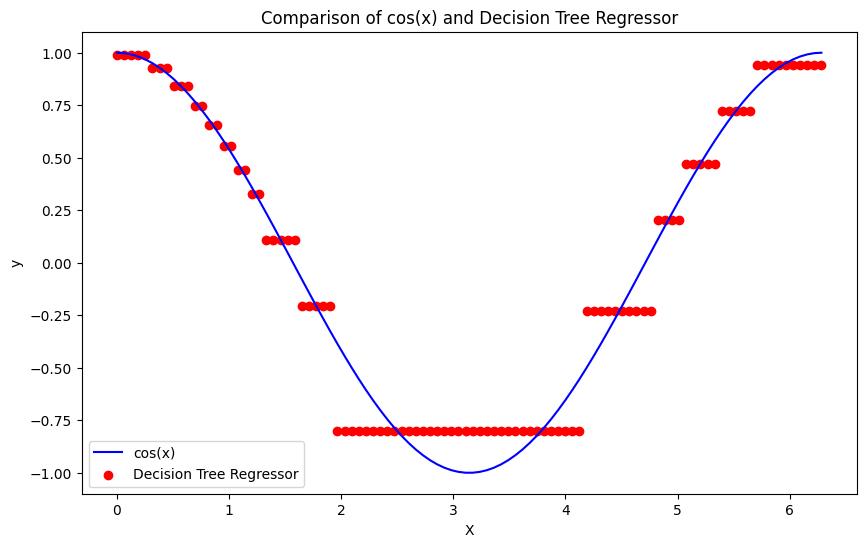

In [ ]:
regressor = DecisionTreeRegressorScratch(max_depth=4)
regressor.tree = regressor.fit(X, y)
# print(regressor.tree)
y_pred3 = regressor.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(X, y, label='cos(x)', color='blue')
plt.scatter(X, y_pred3, label='Decision Tree Regressor', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparison of cos(x) and Decision Tree Regressor')
plt.legend()
plt.show()

# Predict on the generated dataset
# y_pred = regressor.predict(X)